<a href="https://colab.research.google.com/github/BasiraS/data_analytics_2/blob/main/Python/Unit4_L3_ML_Titanic_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Name: Basira Shirzad

# Date: 01-14-2021

# Titanic Dataset Analysis

From Kaggle: The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

# Tasks:



1.   Every step must have an explanation
2.   Every plot/ chart must have an iterpretation
3.   Add your observations for each section
4.   Draw clear conclusions (at least 5 conclusions)



In [157]:
# Import pandas library to perform manipulation and analysis on the data
import pandas as pd

In [158]:
# Import the Titanic data set into a pandas dataframe
train = pd.read_csv('https://raw.githubusercontent.com/niteen11/cuny_lagcc_micro_credential_data_analytics/main/Track%20A/Unit%204%20-%20Machine%20Learning%20and%20Modeling%20Techniques/Dataset/titanic_train.csv')

In [159]:
# Check the head of the dataframe to get a clear idea of all the columns in the dataframe
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


* There are some cases where we have missing data, so we have to check for those and visualize them to get a better idea on how to remove them.

# EDA (Exploratory Data Analysis)

In [160]:
# Import the seaborn and matplotlib library for plotting and data visualization 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [161]:
# Check for missing data in the data frame
train.isnull() 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


* We have boolean values, where true indicates that the value is null and false indicates that the value is not null. Since there are a lot of data, the best thing to do is to use the seaborn library to visualize the null values to make the task easier.

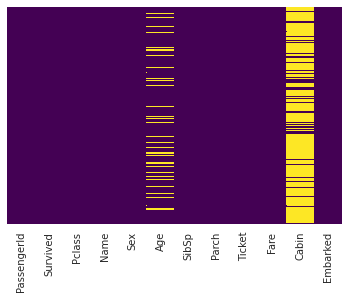

In [162]:
# Visualize the missing data
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

* The Age and Cabin column have null values.

## Class


It is good practice to play around with the data and fully exploit the visualization libraries to have fun with the data.

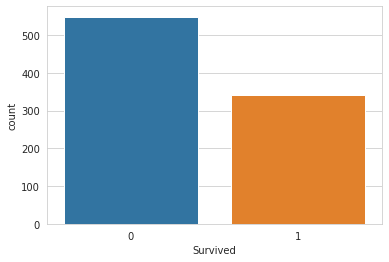

In [163]:
# Number of passengers who survived
sns.set_style('whitegrid')
sns.countplot(x='Survived', data=train)

* This is a count plot that shows the number of passengers that survived.
* This figure shows a trend that many passengers did not survive. 

## Survived

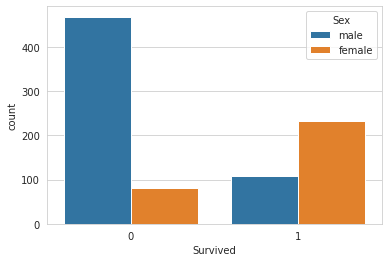

In [164]:
# Number of passengers who survived based on gender
sns.set_style('whitegrid')
sns.countplot(x='Survived', hue='Sex', data=train)

* This is a count plot that shows the number of passengers that survived based on gender.
* This figure shows a trend that more females survived than males.

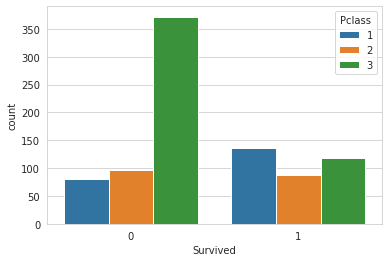

In [165]:
# Number of passengers who survived based on class
sns.set_style('whitegrid')
sns.countplot(x='Survived', hue='Pclass', data=train)

* This is a count plot that shows the number of passengers that survived based on class.
* This figure shows a trend that passengers belonging to class 3 died the most.

# Age

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


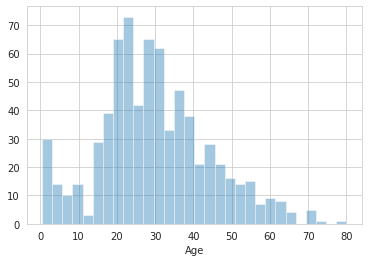

In [166]:
# The distribution of passengers' age on the titanic ship
sns.distplot(train['Age'].dropna(), kde=False, bins=30)

* This is a distribution plot that shows the different groups of age and the number of passengers in each group. 
* This figure shows a trend that there were many passengers from the age group of low 20s and low 30s.

# Siblings

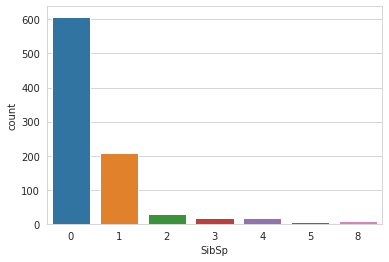

In [167]:
# Number of passengers and the number of relatives they had in the ship
sns.countplot(x='SibSp',data=train)

* This is a count plot that shows the number of passengers and the number of relatives they had in the ship.
* This figure shows a trend that there were many passengers on the ship that came with no relatives. 

# Data Cleaning and Data Pre - Processing

In order to run a model on the train dataframe, we need to fill in values for all  missing data, which are found in the age and cabin columns. 
To fill in the missing age, we can fill it with the average value of age of the passengers based on class for a more accurate representation. 

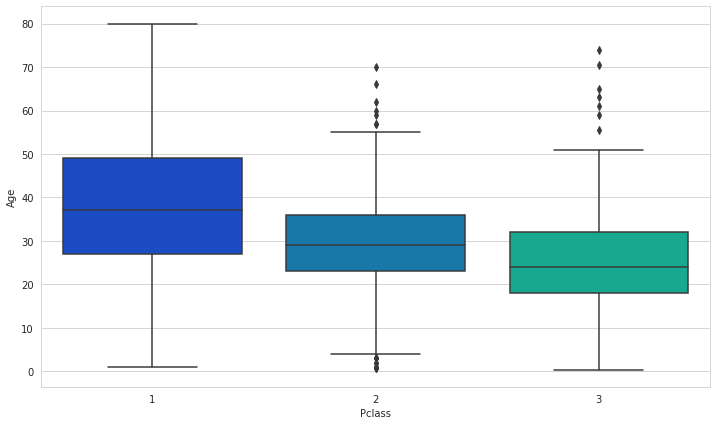

In [168]:
# Figure out the min, max, and average age of passengers in each class
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=train,palette='winter')

* We can see that the wealthier passengers in the higher classes tend to be older, the middle class passengers tend to be in the slightly younger age category compared to the higher class, and the lower class passengers are the youngest. 
* Using these average age values will help fill in the missing values. 

In [169]:
# Function to fill in the correct values of each passenger with missing age based on class
def impute_age(cols):
  Age = cols[0]
  Pclass = cols[1]
  if pd.isnull(Age):
    if Pclass == 1:
      return 37
    elif Pclass == 2:
      return 29
    else:
      return 24
  else:
    return Age

In [170]:
# Apply the function on the age column to fill in the missing values 
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)

There isn't really a way to replace the missing values for the cabin column with something more valuable, so it is better to just drop the column from the data frame. 

In [171]:
# Drop the Cabin column from the train data frame
train.drop('Cabin', axis=1, inplace= True)

In [172]:
# If there is any missing values in the dataframe, just drop that row
train.dropna(inplace=True)

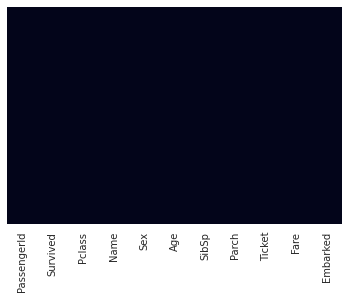

In [173]:
# Check to see if there is still any missing values in the train data frame
sns.heatmap(train.isnull(),yticklabels=False,cbar=False)

* There are no more missing values in the train data frame.

# Converting Categorical Features

Before modeling, we need to convert all categorical features to dummy variables using pandas because the machine learning algorithm won’t be able to directly take in those features as inputs.

In order for our logistic model to work, we need to convert all non-numeric variables to
numeric and drop not needed columns.

In [174]:
# Check for any categorial features in the train data frame
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [175]:
# Convert the sex and embark column into a numerical value
sex = pd.get_dummies(train['Sex'], drop_first=True)
embark = pd.get_dummies(train['Embarked'], drop_first=True)

In [176]:
# Drop the Sex, Embarked, Name, and Ticket column from the data frame 
train.drop(['Sex','Embarked','Name','Ticket'], axis=1, inplace= True)

* Since the Sex, Embarked, Name, and Ticket columns contain categorical features we must take them out from the data frame. 
* Sex and Embark have a discrete number of values, which make it easy to convert to a numerical value and include it in the data frame, but name and ticket are not because they contain different values and it will become very complex if we convert it to a numerical value.

In [177]:
# Check to see if the columns were removed
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [178]:
# Add in the sex and embark column that was converted to numerical values
train = pd.concat([train, sex, embark],axis=1)

In [179]:
# Check to see if the columns were added and they all contain numerical values
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


# Logistic Model building

# Test Train Split

In [180]:
# import from the sklearn library the train_test_split
from sklearn.model_selection import train_test_split

In [181]:
# Split the train data frame so you have a portion of data to train the model and then later test the model
# 30% of the data will be tested and 70% of the data will be trained
X_train, X_test, y_train, y_test = train_test_split(train.drop('Survived',axis=1), train['Survived'],test_size=0.3, random_state=101) 

# Training and Predicting

In [182]:
# import from the sklearn library the logistic regression to build the model
from sklearn.linear_model import LogisticRegression

In [183]:
# Build the Logistic Regression Model
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [184]:
# Store the prediction result of the Logistic Regression Model 
predict = logmodel.predict(X_test)

## Classification report

In [185]:
# import from the sklearn library the classification report to view the evaluation of the model
from sklearn.metrics import classification_report

In [186]:
# Check the evaluation of the Logistic Regression Model 
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.79      0.91      0.85       163
           1       0.82      0.62      0.71       104

    accuracy                           0.80       267
   macro avg       0.81      0.77      0.78       267
weighted avg       0.80      0.80      0.80       267



## Confusion Matrix

In [187]:
# import from the sklearn library the confusion matrix to view the performance of the model
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, predict))

[[149  14]
 [ 39  65]]


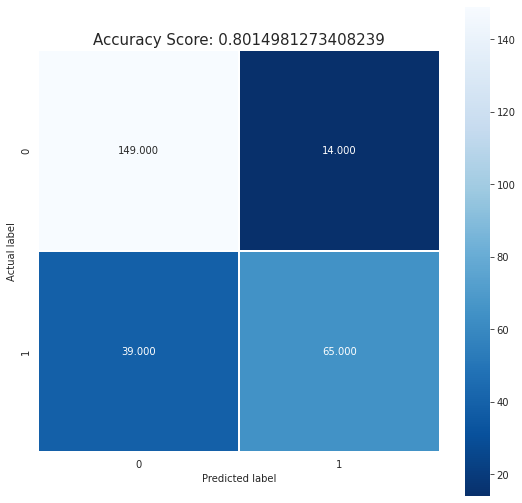

In [188]:
# View the confusion matrix of the Logistic Regression Model 
plt.figure(figsize=(9,9))
sns.heatmap(confusion_matrix(y_test, predict), annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(logmodel.score(X_test, y_test))
plt.title(all_sample_title, size = 15);

In [189]:
# import from the sklearn library metrics to measure the classification performance
from sklearn import metrics

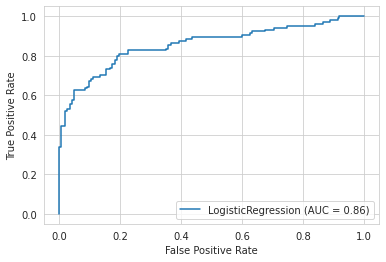

In [190]:
# View classification performance
metrics.plot_roc_curve(logmodel, X_test, y_test)  

# Observation

There was a total of 267 predictions (267 passengers were being tested for their survival rate on the titanic ship). Out of those 267 cases, the model predicted "yes" 79 times and "no" 188 times. In reality, 104 passengers in the sample have survived and 163 passengers did not survive. 
* **Accuracy**: Overall, the model was correct 80% of the time
* **Misclassification Rate**: Overall, the model was 20% of the time incorrect

* **True Positive Rate**: 62.5% of the time the model predicted that the passenger survived and they actually did survive.

* **False Positive Rate**: 8.6% of the time the model predicted that the passenger survived, but they actually did not survive.

* **True Negative Rate**: 91.4% of the time the model predicted that the passenger did not survive and they actually did not survive.

* **False Negative Rate**: 37.5% of the time the model predicted that the passenger did not survive, but they actually did survive.

False Positve is Type I Error & False Negative is Type II Error

# Conclusion...

Overall, this model was pretty good in predicting the chances of a passenger not survivng, but was not so strong in predicting the survival of a passenger. This model can be improved by removing some columns such as the passenger id and the fare, since it includes a wide range of values that could have thrown off the model. 